‚úÖ Toate cele 7 grafice au fost salvate corect, fƒÉrƒÉ polilinii.


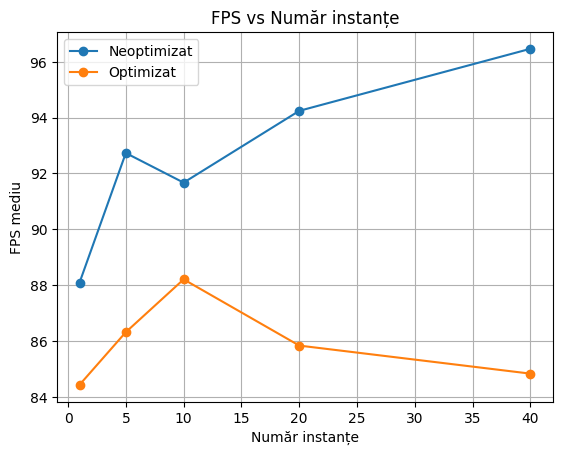

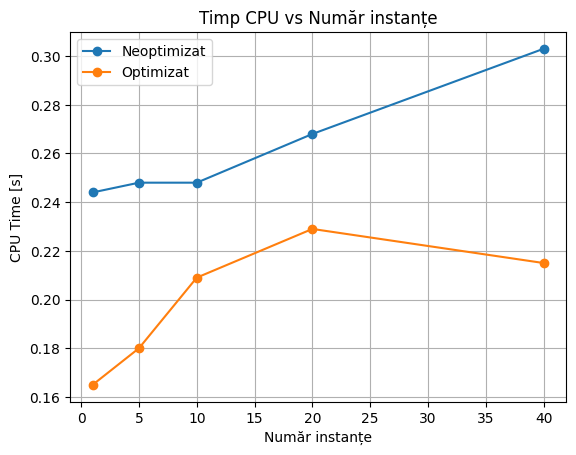

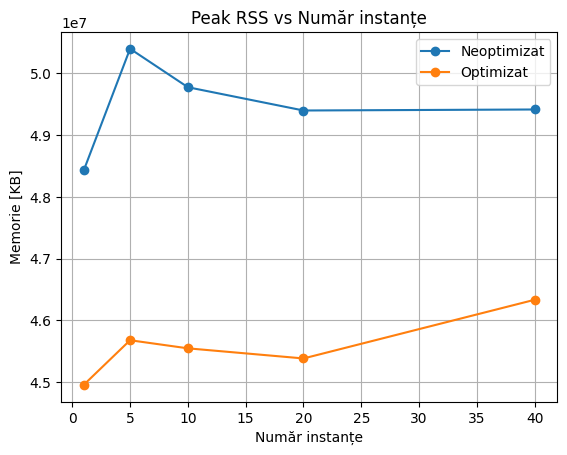

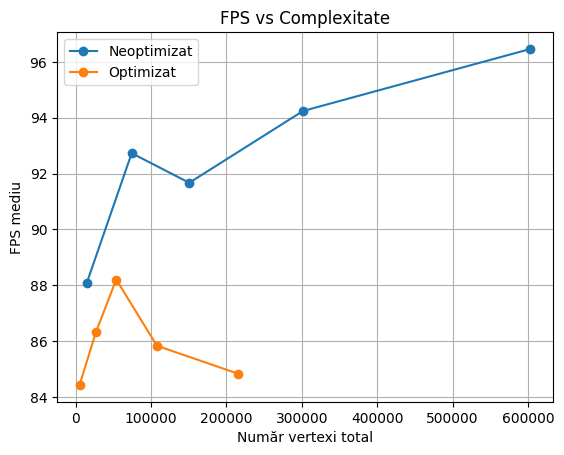

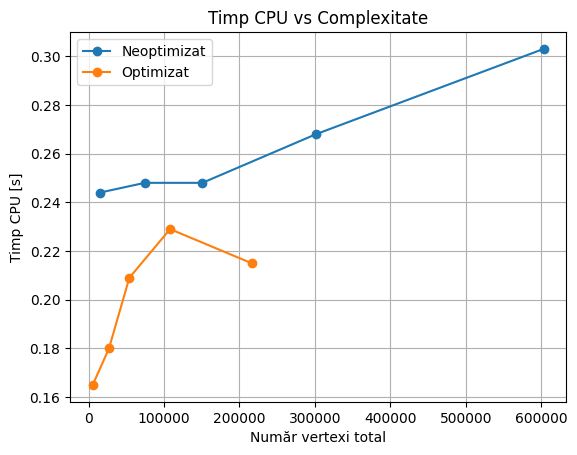

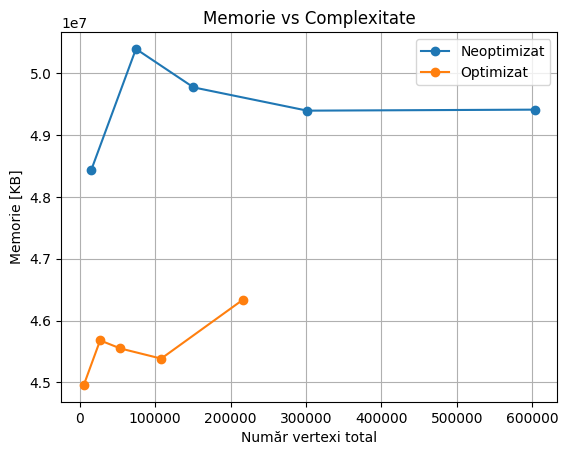

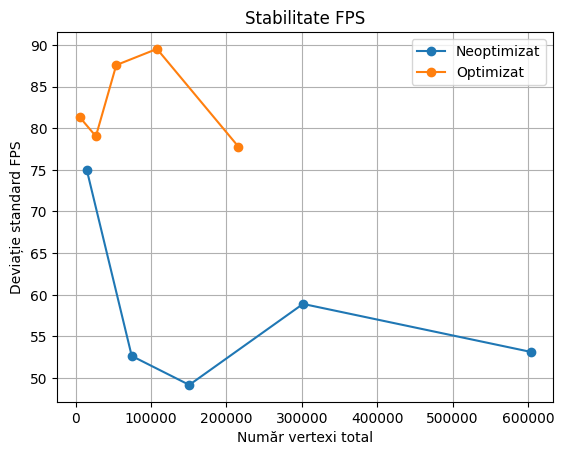

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def read_metrics_from_file(filename):
    try:
        df = pd.read_csv(filename, dtype=str, on_bad_lines='skip')
        df_numeric = df[df['frame'].apply(lambda x: x.isdigit())].astype({'dt_ms': float})
        avg_dt = df_numeric['dt_ms'].mean()
        std_dt = df_numeric['dt_ms'].std()
        fps = 1000.0 / avg_dt if avg_dt > 0 else 0

        with open(filename, "r", encoding="utf-8") as f:
            lines = f.readlines()[-4:]

        cpu = float(lines[1].split(',')[1]) if 'cpu_time' in lines[1] else None
        rss = float(lines[2].split(',')[1]) if 'peak_rss_kb' in lines[2] else None
        verts = int(lines[3].split(',')[1]) if 'vertex_count' in lines[3] else None
        count = int(filename.split('_')[1].split('.')[0])

        return {
            'count': count,
            'avg_fps': fps,
            'std_fps': 1000.0 * std_dt / (avg_dt ** 2) if avg_dt > 0 else 0,
            'cpu_time': cpu,
            'peak_rss_kb': rss,
            'vertex_count': verts
        }
    except Exception as e:
        print(f"‚ùå Eroare √Æn {filename}: {e}")
        return None

# AdunƒÉ fi»ôierele
raw_files = sorted([f for f in os.listdir('.') if f.startswith('raw_') and f.endswith('.csv')])
opt_files = sorted([f for f in os.listdir('.') if f.startswith('opt_') and f.endswith('.csv')])

# Construie»ôte DataFrame-urile
raw_data = [x for x in map(read_metrics_from_file, raw_files) if x is not None]
opt_data = [x for x in map(read_metrics_from_file, opt_files) if x is not None]
raw_df = pd.DataFrame(raw_data)
opt_df = pd.DataFrame(opt_data)

# SorteazƒÉ dupƒÉ count
raw_df = raw_df.sort_values(by='count')
opt_df = opt_df.sort_values(by='count')

def plot_line(x1, y1, x2, y2, xlabel, ylabel, title, filename):
    plt.figure()
    plt.plot(x1, y1, 'o-', label='Neoptimizat')
    plt.plot(x2, y2, 'o-', label='Optimizat')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(filename)

# === GenereazƒÉ graficele ===
plot_line(raw_df['count'], raw_df['avg_fps'], opt_df['count'], opt_df['avg_fps'],
          'NumƒÉr instan»õe', 'FPS mediu', 'FPS vs NumƒÉr instan»õe', 'fps_vs_count.png')

plot_line(raw_df['count'], raw_df['cpu_time'], opt_df['count'], opt_df['cpu_time'],
          'NumƒÉr instan»õe', 'CPU Time [s]', 'Timp CPU vs NumƒÉr instan»õe', 'cpu_vs_count.png')

plot_line(raw_df['count'], raw_df['peak_rss_kb'], opt_df['count'], opt_df['peak_rss_kb'],
          'NumƒÉr instan»õe', 'Memorie [KB]', 'Peak RSS vs NumƒÉr instan»õe', 'mem_vs_count.png')

plot_line(raw_df['vertex_count'], raw_df['avg_fps'], opt_df['vertex_count'], opt_df['avg_fps'],
          'NumƒÉr vertexi total', 'FPS mediu', 'FPS vs Complexitate', 'fps_vs_vertex_count.png')

plot_line(raw_df['vertex_count'], raw_df['cpu_time'], opt_df['vertex_count'], opt_df['cpu_time'],
          'NumƒÉr vertexi total', 'Timp CPU [s]', 'Timp CPU vs Complexitate', 'cpu_vs_vertex_count.png')

plot_line(raw_df['vertex_count'], raw_df['peak_rss_kb'], opt_df['vertex_count'], opt_df['peak_rss_kb'],
          'NumƒÉr vertexi total', 'Memorie [KB]', 'Memorie vs Complexitate', 'mem_vs_vertex_count.png')

plot_line(raw_df['vertex_count'], raw_df['std_fps'], opt_df['vertex_count'], opt_df['std_fps'],
          'NumƒÉr vertexi total', 'Devia»õie standard FPS', 'Stabilitate FPS', 'std_fps_vs_vertex_count.png')

print("‚úÖ Toate cele 7 grafice au fost salvate corect, fƒÉrƒÉ polilinii.")

Optimizare

üìâ Reducerea medie a vertexilor: -762.76%
‚úÖ Grafice salvate: opt_time_vs_complexity.png, reduction_pct.png, verts_before_vs_after.png


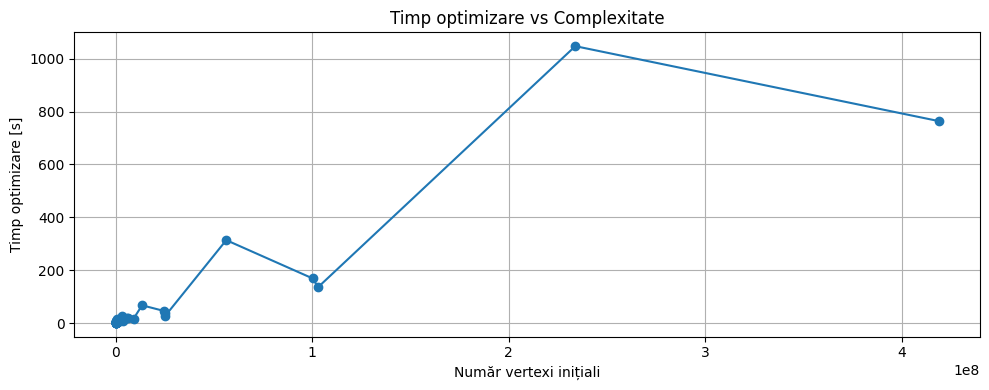

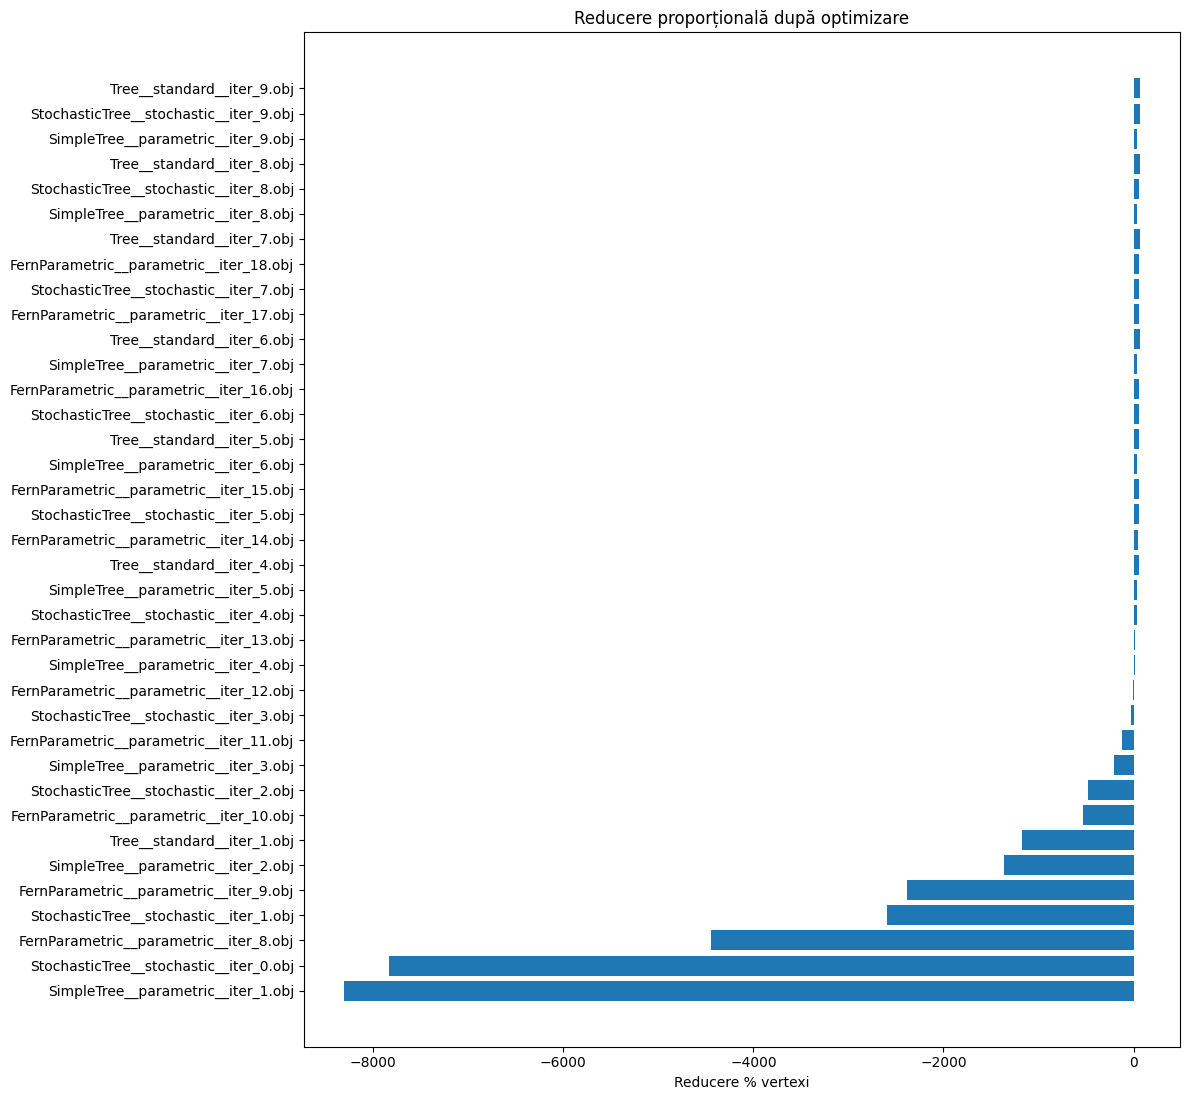

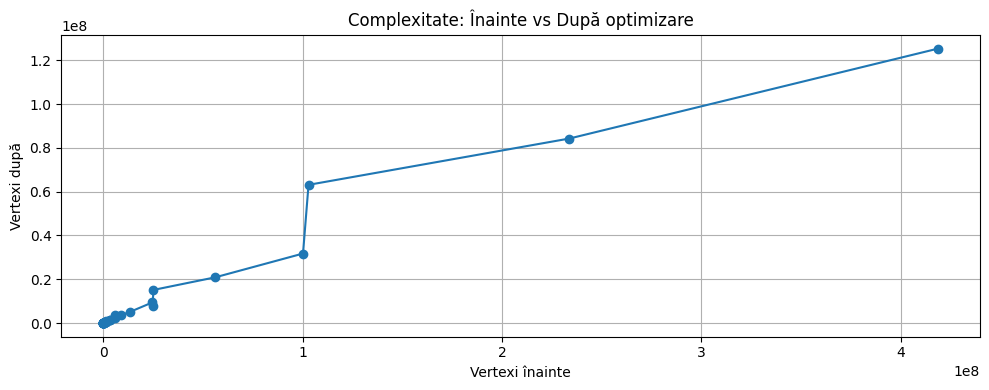

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Cite»ôte fi»ôierul CSV (fƒÉrƒÉ antet)
df = pd.read_csv("optimize_times.csv", header=None)
df.columns = ['filename', 'verts_before', 'opt_time_sec', 'verts_after']

# SorteazƒÉ dupƒÉ numƒÉrul ini»õial de vertexi
df = df.sort_values(by='verts_before')

# CalculeazƒÉ reducerea procentualƒÉ
df['reduction_pct'] = 100 * (df['verts_before'] - df['verts_after']) / df['verts_before']

# ‚úÖ CalculeazƒÉ media reducerii
mean_reduction = df['reduction_pct'].mean()
print(f"üìâ Reducerea medie a vertexilor: {mean_reduction:.2f}%")

# === GRAFIC 1: Timp optimizare vs vertexi ini»õiali ===
plt.figure(figsize=(10, 4))  # Mai lat
plt.plot(df['verts_before'], df['opt_time_sec'], 'o-')
plt.xlabel('NumƒÉr vertexi ini»õiali')
plt.ylabel('Timp optimizare [s]')
plt.title('Timp optimizare vs Complexitate')
plt.grid(True)
plt.tight_layout()
plt.savefig("opt_time_vs_complexity.png")

# === GRAFIC 2: Reducere procentualƒÉ vertexi ===
plt.figure(figsize=(12, 0.3 * len(df)))  # Mai √Ænalt pentru multe bare
plt.barh(df['filename'], df['reduction_pct'])
plt.xlabel('Reducere % vertexi')
plt.title('Reducere propor»õionalƒÉ dupƒÉ optimizare')
plt.tight_layout()
plt.savefig("reduction_pct.png")

# === GRAFIC 3: Vertexi ini»õiali vs finali ===
plt.figure(figsize=(10, 4))
plt.plot(df['verts_before'], df['verts_after'], 'o-')
plt.xlabel('Vertexi √Ænainte')
plt.ylabel('Vertexi dupƒÉ')
plt.title('Complexitate: √énainte vs DupƒÉ optimizare')
plt.grid(True)
plt.tight_layout()
plt.savefig("verts_before_vs_after.png")

print("‚úÖ Grafice salvate: opt_time_vs_complexity.png, reduction_pct.png, verts_before_vs_after.png")

Generare

‚úÖ Grafice salvate: gen_time_vs_iter.png, txt_write_vs_iter.png, obj_gen_vs_iter.png, total_time_vs_iter.png, string_length_vs_iter.png


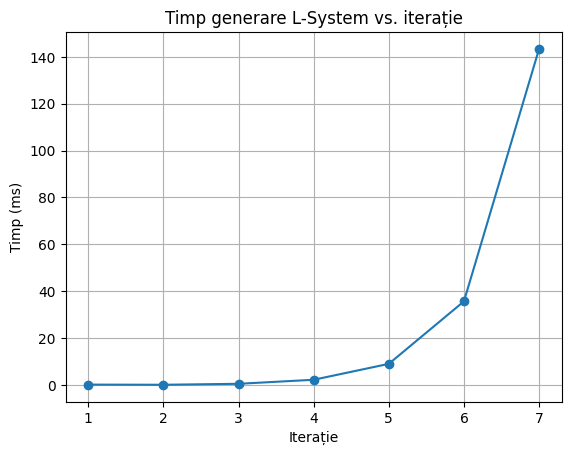

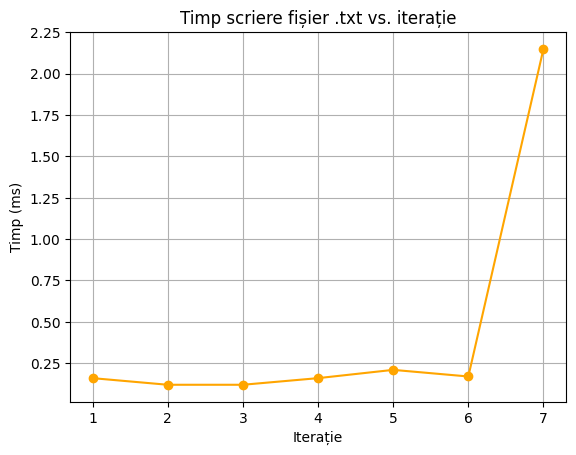

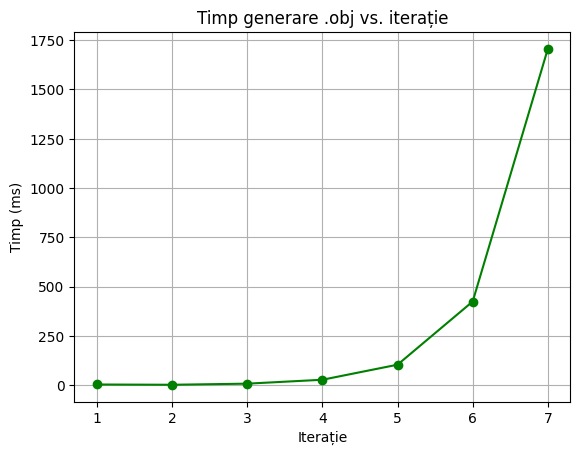

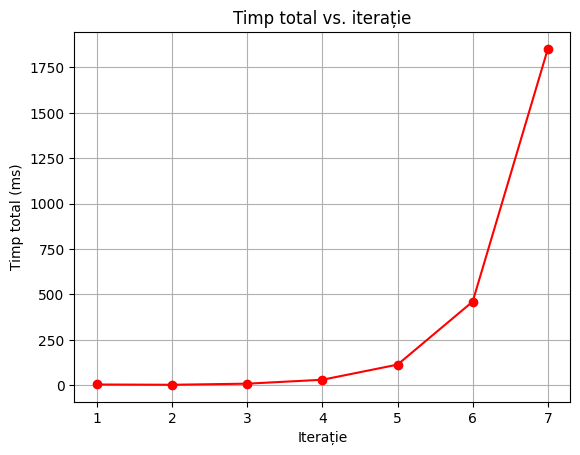

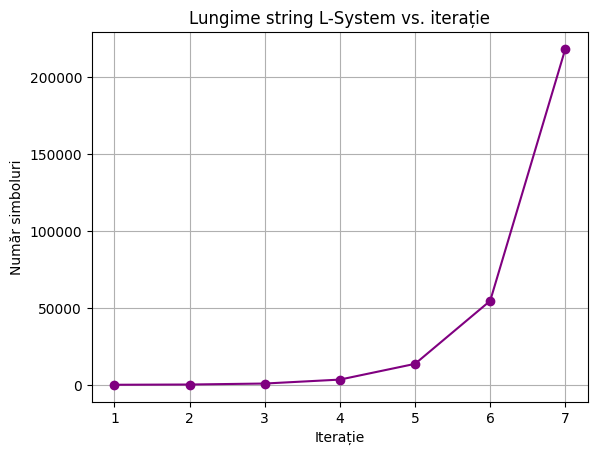

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# === Citire CSV ===
df = pd.read_csv("benchmark_full_generation.csv")

# Asigurare tipuri numerice
df['iteration'] = pd.to_numeric(df['iteration'], errors='coerce')
df['generate_ms'] = pd.to_numeric(df['generate_ms'], errors='coerce')
df['txt_write_ms'] = pd.to_numeric(df['txt_write_ms'], errors='coerce')
df['obj_gen_ms'] = pd.to_numeric(df['obj_gen_ms'], errors='coerce')
df['total_ms'] = pd.to_numeric(df['total_ms'], errors='coerce')
df['string_length'] = pd.to_numeric(df['string_length'], errors='coerce')

# Eliminare r√¢nduri invalide
df = df.dropna()

# === 1. Timp generare L-System ===
plt.figure()
plt.plot(df['iteration'], df['generate_ms'], 'o-', label='Timp generare regulƒÉ')
plt.xlabel('Itera»õie')
plt.ylabel('Timp (ms)')
plt.title('Timp generare L-System vs. itera»õie')
plt.grid(True)
plt.savefig("gen_time_vs_iter.png")

# === 2. Timp scriere fi»ôier TXT ===
plt.figure()
plt.plot(df['iteration'], df['txt_write_ms'], 'o-', label='Timp scriere .txt', color='orange')
plt.xlabel('Itera»õie')
plt.ylabel('Timp (ms)')
plt.title('Timp scriere fi»ôier .txt vs. itera»õie')
plt.grid(True)
plt.savefig("txt_write_vs_iter.png")

# === 3. Timp generare .obj ===
plt.figure()
plt.plot(df['iteration'], df['obj_gen_ms'], 'o-', label='Timp generare .obj', color='green')
plt.xlabel('Itera»õie')
plt.ylabel('Timp (ms)')
plt.title('Timp generare .obj vs. itera»õie')
plt.grid(True)
plt.savefig("obj_gen_vs_iter.png")

# === 4. Timp total ===
plt.figure()
plt.plot(df['iteration'], df['total_ms'], 'o-', label='Timp total', color='red')
plt.xlabel('Itera»õie')
plt.ylabel('Timp total (ms)')
plt.title('Timp total vs. itera»õie')
plt.grid(True)
plt.savefig("total_time_vs_iter.png")

# === 5. Lungime string generat ===
plt.figure()
plt.plot(df['iteration'], df['string_length'], 'o-', label='Lungime »ôir', color='purple')
plt.xlabel('Itera»õie')
plt.ylabel('NumƒÉr simboluri')
plt.title('Lungime string L-System vs. itera»õie')
plt.grid(True)
plt.savefig("string_length_vs_iter.png")

print("‚úÖ Grafice salvate: gen_time_vs_iter.png, txt_write_vs_iter.png, obj_gen_vs_iter.png, total_time_vs_iter.png, string_length_vs_iter.png")